In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import random

In [2]:
data = pd.read_excel("D:\大四下\ML\HW2\HW2.xlsx")
data

,Unnamed: 0,x1,x2,class
0,0,18.73341,64.74255,1
1,1,3.99410,90.31358,1
2,2,23.39904,87.20672,1
3,3,24.83011,65.38512,1
4,4,13.73641,53.82633,1
...,...,...,...,...
995,995,54.10317,17.12986,4
996,996,93.22444,11.30329,4
997,997,86.16369,28.73599,4
998,998,79.43405,22.69025,4


In [3]:
data.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: Unnamed: 0, Length: 1000, dtype: int64

In [4]:
data

,x1,x2,class
0,18.73341,64.74255,1
1,3.99410,90.31358,1
2,23.39904,87.20672,1
3,24.83011,65.38512,1
4,13.73641,53.82633,1
...,...,...,...
995,54.10317,17.12986,4
996,93.22444,11.30329,4
997,86.16369,28.73599,4
998,79.43405,22.69025,4


In [5]:
data = data.to_numpy()

In [6]:
x1 = data[:, 0]
x2 = data[:, 1]
Class = data[:, 2]

### Part1. Generative Model

In [7]:
pi_1 = np.count_nonzero(Class == 1) / len(Class)
pi_2 = np.count_nonzero(Class == 2) / len(Class)
pi_3 = np.count_nonzero(Class == 3) / len(Class)
pi_4 = np.count_nonzero(Class == 4) / len(Class)
print(pi_1, pi_2, pi_3, pi_4)

0.4 0.25 0.2 0.15


**clarify data in different class**

In [8]:
Class1 = []
Class2 = []
Class3 = []
Class4 = []
#Classify the data into tuple according to its class
for i in range(len(x1)):
    if Class[i] == 1:
        Class1.append((x1[i], x2[i]))
    elif Class[i] == 2:
        Class2.append((x1[i], x2[i]))
    if Class[i] == 3:
        Class3.append((x1[i], x2[i]))
    if Class[i] == 4:
        Class4.append((x1[i], x2[i]))

**Define Gaussian distribution of p(x|C)**

In [9]:
def Gau(x, mu, cov):
    """
    x: (x1, x2) tuple
    mu: (u1, u2) tuple
    """
    prob = (1 / 2 * math.pi) * (1 / np.linalg.det(cov) ** (1 / 2)) * math.exp(-1/2 * np.dot(np.dot((x - mu).T, np.linalg.inv(cov)), (x - mu)))
    return prob

**Best Mean & Covariance Matrix(Closed form)**

In [10]:
def best_mean(x):
    """
    x: list -> 2 * N
    element in x: tuple -> 1 * 2
    return best mean: u1, u2 -> 2 * 1
    """
    temp0 = 0
    temp1 = 0
    for i in x:
        temp0 += i[0]
        temp1 += i[1]
    length = len(x)
    return np.array((temp0 / length, temp1 / length))[np.newaxis].T

In [11]:
def cov(x, u):
    """
    x: list
    u: tuple of (u1, u2)
    """
    ans = np.zeros((2, 2))
    for i in x:
        temp = np.array(i)[np.newaxis].T - u
        ans += np.dot(temp, temp.T)
    ans /= len(x)
    return ans

In [12]:
mu1 = best_mean(Class1)
mu2 = best_mean(Class2)
mu3 = best_mean(Class3)
mu4 = best_mean(Class4)

In [13]:
def best_cov(x1, x2, x3, x4):
    """
    x1, x2, x3, x4: list
    """
    temp = 0
    mu = 0
    
    mu = best_mean(Class1)
    temp1 = cov(Class1, mu)
    mu = best_mean(Class2)
    temp2 = cov(Class2, mu)
    mu = best_mean(Class3)
    temp3 = cov(Class3, mu)
    mu = best_mean(Class4)
    temp4 = cov(Class4, mu)
    
    return (len(x1) * temp1 + len(x2) * temp2 + len(x3) * temp3 + len(x4) * temp4) / (len(x1) + len(x2) + len(x3) + len(x4))

In [14]:
final_cov = best_cov(Class1, Class2, Class3, Class4)
final_cov

array([[186.38980095,   7.86502509],
       [  7.86502509, 182.43369113]])

**obtain p(x|C) and determine which calss does x belongs to**

In [15]:
def best_prob(x, m1, m2, m3, m4, cov):
    """
    x: list -> 2 * 1(單筆x data)
    return: int
    """
    p_1 = 0
    p_2 = 0
    p_3 = 0
    p_4 = 0
    temp = []
    p_1 = pi_1 * Gau(x, m1, cov)
    p_2 = pi_2 * Gau(x, m2, cov)
    p_3 = pi_3 * Gau(x, m3, cov)
    p_4 = pi_4 * Gau(x, m4, cov)
    total = p_1 + p_2 + p_3 + p_4
    temp.append(p_1 / total)
    temp.append(p_2 / total)
    temp.append(p_3 / total)
    temp.append(p_4 / total)
    return temp.index(max(temp))

In [ ]:
result = np.zeros((1000, 1000))
for x in np.linspace(0.0, 100.0, num=1000):
    for y in np.linspace(0.0, 100.0, num=1000):
        result[int(x * 10 - 0.001), int(y * 10 - 0.001)] = best_prob(np.array((x, y))[np.newaxis].T, mu1, mu2, mu3, mu4, final_cov)

In [17]:
result

array([[2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       ...,
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.]])

In [18]:
#blue -> 1
#green -> 2
#red -> 3
#black -> 4
cmap = mpl.colors.ListedColormap(['b', 'g', 'r', '#000000'])

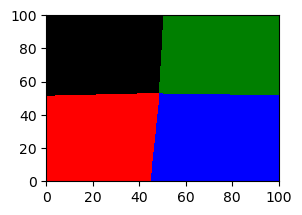

In [19]:
fig , ax = plt.subplots(figsize=(3, 10))
plt.imshow(result, cmap = cmap, interpolation = 'none', origin = "lower", extent = [0, 100, 0, 100], aspect = 1 / 1.4)

In [18]:
test_data = pd.read_excel("D:\\大四下\\ML\\hw2_demo\\testingData.xlsx")
test_data

,Unnamed: 0,x1,x2
0,0,25.33270,60.77430
1,1,68.65419,92.65231
2,2,76.50180,10.90763
3,3,55.31886,52.93528
4,4,6.81996,78.10947
...,...,...,...
9995,9995,70.07158,73.27779
9996,9996,24.82610,35.17770
9997,9997,46.99942,18.74366
9998,9998,10.22575,93.15863


In [19]:
test_data.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Unnamed: 0, Length: 10000, dtype: int64

In [20]:
test_data

,x1,x2
0,25.33270,60.77430
1,68.65419,92.65231
2,76.50180,10.90763
3,55.31886,52.93528
4,6.81996,78.10947
...,...,...
9995,70.07158,73.27779
9996,24.82610,35.17770
9997,46.99942,18.74366
9998,10.22575,93.15863


In [ ]:
test_data = test_data.to_numpy()

In [24]:
test_data[0]

array([25.3327, 60.7743])

In [45]:
gen_1 = []
for i in range(len(test_data)):
    gen_1.append(best_prob(np.array((test_data[i][0], test_data[i][1]))[np.newaxis].T, mu1, mu2, mu3, mu4, final_cov) + 1)

In [46]:
gen_1 = pd.DataFrame(gen_1)

In [47]:
len(gen_1)

10000

In [48]:
gen_1.to_csv('D:\\大四下\\ML\\hw2_demo\\A.csv')

### Part1. Discriminative Model

In [20]:
var_Class = []
var_Class.append((np.var(list(zip(*Class1))[0]), np.var(list(zip(*Class1))[1])))
var_Class.append((np.var(list(zip(*Class2))[0]), np.var(list(zip(*Class2))[1])))
var_Class.append((np.var(list(zip(*Class3))[0]), np.var(list(zip(*Class3))[1])))
var_Class.append((np.var(list(zip(*Class4))[0]), np.var(list(zip(*Class4))[1])))

In [695]:
mu = np.zeros((4, 2))
mu[0][0] = mu1[0][0]
mu[0][1] = mu1[1][0]
mu[1][0] = mu2[0][0]
mu[1][1] = mu2[1][0]
mu[2][0] = mu3[0][0]
mu[2][1] = mu3[1][0]
mu[3][0] = mu4[0][0]
mu[3][1] = mu4[1][0]
mu

array([[25.90238108, 72.8619133 ],
       [74.157746  , 75.88818556],
       [27.40313325, 26.22084015],
       [74.15287553, 26.6224472 ]])

In [22]:
var_Class

[(192.53579591541157, 177.1388717487521),
 (182.12759912658558, 179.29559043342388),
 (199.8670559651959, 204.2028149080975),
 (159.13447736141006, 172.75787890503082)]

In [696]:
#2D Gaussian basis function
def basis(x1, x2, j, M):
    """
    x1, x2: int
    y: int
    M: int
    return: int
    """
    #final_cov
    data = np.array((x1, x2))
    return np.exp(-0.5 * (data - mu[j]).T @ np.linalg.inv(final_cov) @ (data - mu[j])) / (2 * np.pi * np.sqrt(np.linalg.det(final_cov)))

In [697]:
def design_matrix(x1, x2, M):
    """
    x1, x2:list
    M: int, the number of basis function
    return: array
    """
    phi = np.zeros((len(x1), M))
    for i in range(len(x1)):
        for j in range(M):
            phi[i][j] = basis(x1[i], x2[i], j, M)
    return phi

In [698]:
design_matrix(x1[:5], x2[:5], 4)

array([[6.36376795e-04, 1.84161380e-07, 1.11074213e-05, 2.54914997e-09],
       [9.43206859e-05, 6.92946258e-10, 1.76788009e-09, 8.02718324e-15],
       [4.78794871e-04, 5.23357715e-07, 2.87153412e-08, 1.75260349e-11],
       [7.40041286e-04, 1.04026093e-06, 1.22901161e-05, 1.29717511e-08],
       [2.26422698e-04, 1.69543459e-08, 5.91242084e-05, 4.24955444e-09]])

**Generate initial parameters for basis function**

In [785]:
M = 4 #assume we have 4 basis function
W = np.zeros((M * 4, 1))
class_num = 4 #we have 4 classes in total
for i in range(M * 4):
    num = random.randint(1, 100) #/ 100
    '''while num == 0: #if num = 0
        num = random.randint(0, 100) #/ 100'''
    W[i] = num
W_1 = W[:M]
W_2 = W[M:2 * M]
W_3 = W[2 * M:3 * M]
W_4 = W[3 * M:]

In [595]:
W = temp_W

In [786]:
temp_W = W
W.reshape((4, 4))

array([[67., 91., 37., 55.],
       [25., 87., 23., 19.],
       [57., 66., 95., 13.],
       [13., 29., 39., 95.]])

In [725]:
def logit(x1, x2, M, W):
    """
    x1: list
    x2: list
    y: list
    return: list with 4 int, corresponding to different result of x if subtitute in different logit function
    """
    phi = design_matrix(x1, x2, M)
    final = np.zeros((4, len(x1)))
    W_ = W.reshape((4, M))
    return np.dot(W_, phi.T)

In [726]:
logit(x1, x2, M, W).shape

(4, 1000)

In [746]:
def y_softmax(x1, x2, M, W):
    """
    x1: list
    x2: list
    M: int
    W: list
    return p(C1 | x), p(C2 | x), p(C3 | x), p(C4 | x) in list
    """
    ans = logit(x1, x2, M, W)
    y = np.zeros((4, len(x1)))
    
    for i in range(len(x1)):
        nor = 0
        for j in range(4):
            nor += np.exp(ans[j][i])
        for k in range(4):
            y[k][i] = np.exp(ans[k][i]) / nor
    idx = []
    Y = y.T

    for i in range(len(Y)):
        idx.append(np.argmax(Y[i]) + 1)
                   
    return Y, idx

In [767]:
y_softmax(x1[:5], x2[:5], 4, W)

(array([[0.24732903, 0.25010187, 0.24387197, 0.25869713],
        [0.24961772, 0.25001581, 0.24909781, 0.25126867],
        [0.24804378, 0.25005714, 0.24542572, 0.25647336],
        [0.24689632, 0.25011012, 0.24287725, 0.26011631],
        [0.24878624, 0.25027168, 0.24754459, 0.25339749]]),
 [4, 4, 4, 4, 4])

**Iterate the weight**

In [630]:
def deri_Error(x1, x2, y, M, W):
    result = np.zeros((4 * M, 1))
    phi = design_matrix(x1, x2, M)
    prob, idx = y_softmax(x1, x2, M, W)
    for j in range(len(prob[0])): #for every class(length: 4)
        add = np.zeros((M, 1))
        t_n = 0
        for i in range(len(prob)): #for every data(length: N)
            t_n = 1 if (y[i] - 1) == j else 0
            add += [x * (prob[i][j] - t_n) for x in phi[i][np.newaxis].T]
        result[j * M:(j + 1) * M] = add
    return result

In [621]:
design_matrix(x1, x2, M)[i][np.newaxis].T.shape

(7, 1)

In [517]:
deri_Error(x1, x2, Class, M, W).shape

(28, 1)

In [751]:
def H(x1, x2, y, M, W):
    result = np.zeros((4 * M, 4 * M))
    phi = design_matrix(x1, x2, M)
    prob, idx = y_softmax(x1, x2, M, W)
    for k in range(4): #row
            for j in range(4): #col
                add = np.zeros((M, M))
                I = 1 if k == j else 0
                for w in range(len(y)): #sum up for all data
                    mul = prob[w][k]
                    minus = prob[w][j]
                    add += [x * (mul * (I - minus)) for x in np.dot(phi[w][np.newaxis].T, phi[w][np.newaxis])]
                result[k * M:(k + 1) * M, j * M: (j + 1) * M] = add
    return result

In [704]:
def SVD_inv(H1):
    th = 1e-100 #threshold fot small singular values
    u, s, vh = np.linalg.svd(H1)
    u = np.linalg.inv(u)
    s = np.linalg.inv(np.diag(s))
    vh = np.linalg.inv(vh)
    H1_inv = np.dot(vh, np.dot(s, u))
    return H1_inv

In [765]:
def Error(x1, x2, M, W):
    w = W.reshape(4, M)
    phi = design_matrix(x1, x2, M)
    #a = np.dot(w, phi.T) # k x N
    y = y_softmax(x1, x2, M, W)[0]
    error = 0  
    for j in range(len(x1)):
        error += np.log(y[Class[j] - 1][j])

    error *= -1          
    return error

0
1
2
3
4


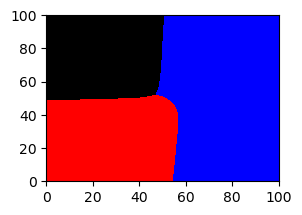

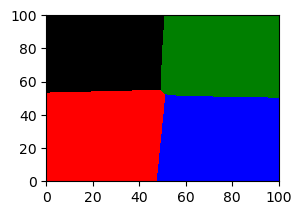

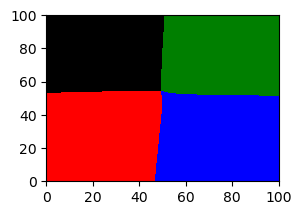

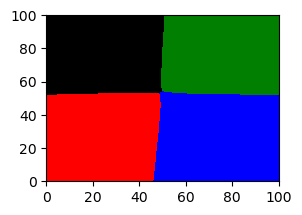

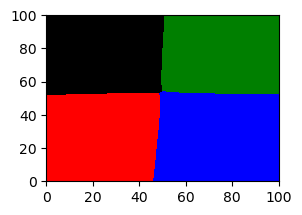

In [787]:
store = []
count = 0
#abs(old - new) > 0.00001
lst = []
for x in np.linspace(0.0, 100.0, num=1000):
    for y in np.linspace(0.0, 100.0, num=1000):
        lst.append((x, y)) 
input_1 = [i[0] for i in lst]
input_2 = [i[1] for i in lst]
count = 0
stop = 0
while True:  #先iterate 5 次 
    if count > 4 or stop > 5:
        break
    #print(W.reshape((4, 7)))
    X1 = x1
    X2 = x2
    Y = Class
    H1 = H(X1, X2, M, W)
    H1_inv = SVD_inv(H1)
    old_error = Error(X1, X2, M, W)
    prob, idx = y_softmax(input_1, input_2, M, W)
    result = np.array(idx).reshape((1000, 1000))
    fig , ax = plt.subplots(figsize=(3, 10))
    plt.imshow(result, cmap = cmap, interpolation = 'none', origin = "lower", extent = [0, 100, 0, 100], aspect = 1 / 1.4)
    
    W = W - np.dot(H1_inv, deri_Error(X1, X2, Y, M, W))
    #W = W - np.array([x * 0.05 for x in deri_Error(X1, X2, Class, M, W)])
    new_error = Error(X1, X2, M, W)
    '''if old_error - new_error < 0.00001:
        stop += 1'''
    store.append(W)
    print(count)
    count += 1